# Preprocessing Data

Loading in the data -> doing preprocessing and exporing data for the analysis step.


Preprocessing steps:

1. load in MNE data

2. Demean the data

3. Get events

4. Epoch events: no baseline

5. Bad channel rejection 

6. Do ICA for DBS artefacts

7. ICA exclude bad components

8. Bandpass filter data from 1 Hz to 100 Hz

9. Get evoked response average

10. Plot PSD

In [423]:
# importations
import mne, fooof, numpy as np, pandas as pd, os, glob, sys
from mne.preprocessing import ICA
from IPython.display import display, Markdown
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

In [424]:
def ica_thing(n_components, raw):
    ica = ICA(n_components=n_components, max_iter='auto', random_state=97)
    ica.fit(raw)
    ica.plot_components();
    return ica

In [120]:
pwd

'/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500'

In [4]:
!mne --version

MNE 1.2.1


In [435]:
raw_dir = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/fif/sub22_ses00-raw.fif'
raw = mne.io.read_raw_fif(raw_dir)
raw

Opening raw data file /external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/fif/sub22_ses00-raw.fif...
    Range : 0 ... 479599 =      0.000 ...    95.920 secs
Ready.


<Raw | sub22_ses00-raw.fif, 73 x 479600 (95.9 s), ~103 kB, data not loaded>

In [436]:
raw.load_data()

Reading 0 ... 479599  =      0.000 ...    95.920 secs...


<Raw | sub22_ses00-raw.fif, 73 x 479600 (95.9 s), ~267.2 MB, data loaded>

In [437]:
stim_chan = raw.copy().pick_channels(['stim'])
events = mne.event.find_events(stim_chan)


raw_dat = raw.pick_types(eeg=True).get_data()
raw_dat_demean = np.zeros_like(raw_dat)
for ch, chan_data in enumerate(raw_dat):
    raw_dat_demean[ch] = raw_dat[ch] - raw_dat[ch].mean()   

new_raw1 = mne.io.RawArray(raw_dat_demean, raw.pick_types(eeg=True).info)
#new_raw1 = mne.io.RawArray(raw_dat, raw.pick_types(eeg=True).info)

31 events found
Event IDs: [1 2]
Creating RawArray with float64 data, n_channels=64, n_times=479600
    Range : 0 ... 479599 =      0.000 ...    95.920 secs
Ready.


In [421]:
freqs

array([125, 126, 127, 128, 129, 130, 131, 132, 133, 134])

In [419]:
new_raw2.plot()

In [417]:
new_raw1.plot()

In [438]:
#test = raw.notch_filter(130)
#new_raw2 = new_raw1.copy().filter(2, 100)
new_raw2 = new_raw1.copy().filter(1, 200)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 200.00 Hz
- Upper transition bandwidth: 50.00 Hz (-6 dB cutoff frequency: 225.00 Hz)
- Filter length: 16501 samples (3.300 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    2.3s finished


In [439]:
new_raw1.plot()

Channels marked as bad:
none


In [440]:
new_raw2.plot()

In [441]:
#new_raw2.drop_channels(['AF7','PO8','FT8', 'FT10'])

#new_raw2.drop_channels(['AF7','PO8','FT8', 'FT10', 'C1', 'Fp2'])
new_raw2.drop_channels(['F8'])

<RawArray | 63 x 479600 (95.9 s), ~230.6 MB, data loaded>

In [442]:
epochs = mne.Epochs(new_raw2, events, tmin=-0.1, tmax=1.8, baseline=None)

Not setting metadata
31 matching events found
No baseline correction applied
0 projection items activated


In [443]:
epochs.plot()

Using data from preloaded Raw for 31 events and 9501 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 20 events and 9501 original time points ...
Using data from preloaded Raw for 3 events and 9501 original time points ...
Using data from preloaded Raw for 3 events and 9501 original time points ...
Using data from preloaded Raw for 3 events and 9501 original time points ...
Using data from preloaded Raw for 3 events and 9501 original time points ...
Using data from preloaded Raw for 3 events and 9501 original time points ...
Using data from preloaded Raw for 3 events and 9501 original time points ...
Using data from preloaded Raw for 20 events and 9501 original time points ...
Using data from preloaded Raw for 3 events and 9501 original time points ...
Using data from preloaded Raw for 3 events and 9501 original time points ...
Using data from preloaded Raw for 20 events and 9501 original time points ...
Using data from preloaded Raw for 3 events and 9501

Dropped 3 epochs: 5, 23, 24
The following epochs were marked as bad and are dropped:
[5, 23, 24]
Channels marked as bad:
none


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Using data from preloaded Raw for 28 events and 9501 original time points ...
Selecting by number: 30 components
Using data from preloaded Raw for 28 events and 9501 original time points ...
Fitting ICA took 31.1s.


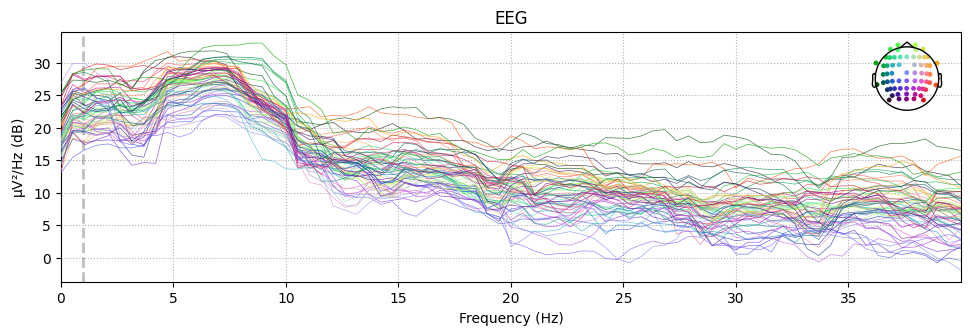

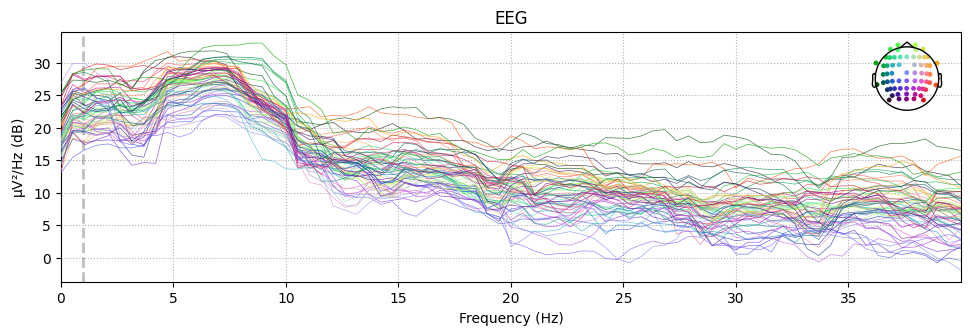

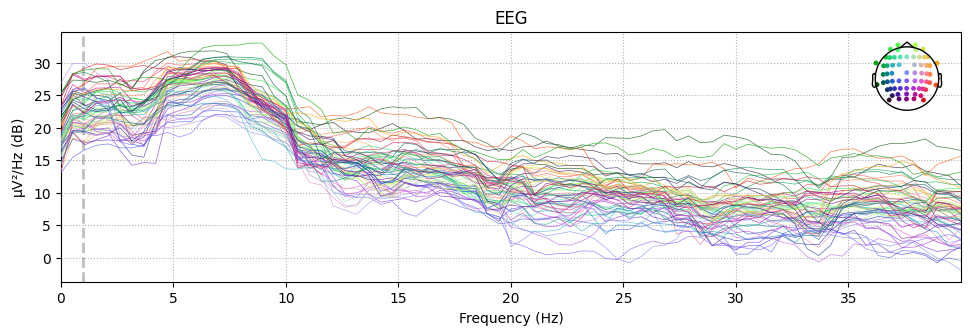

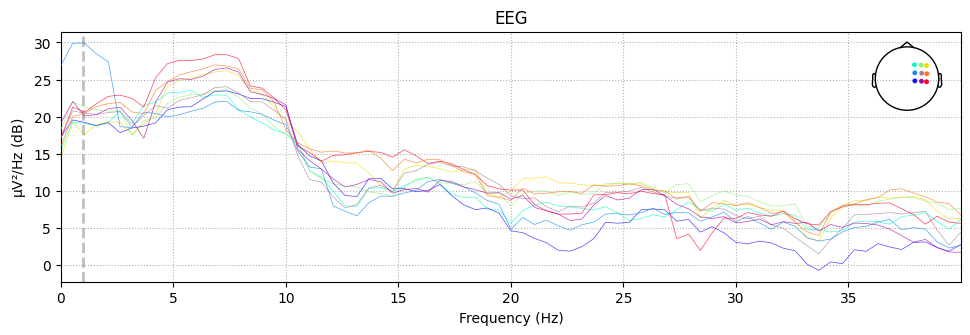

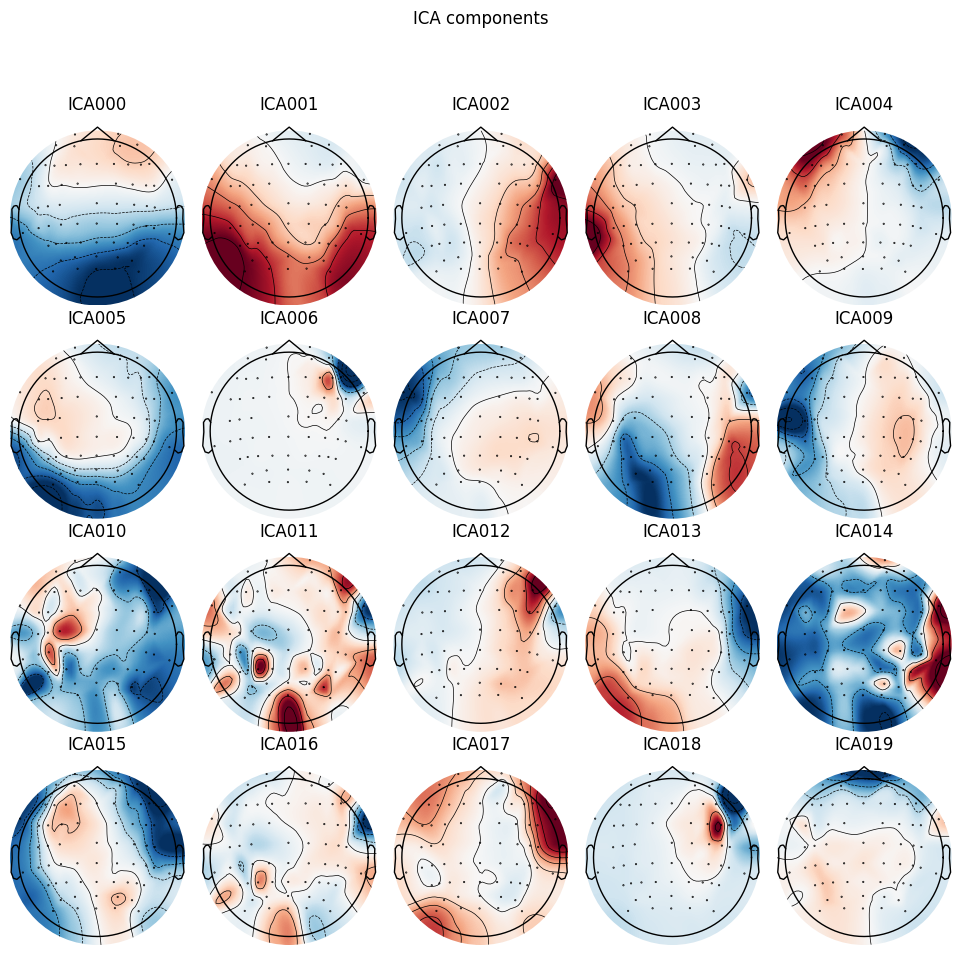

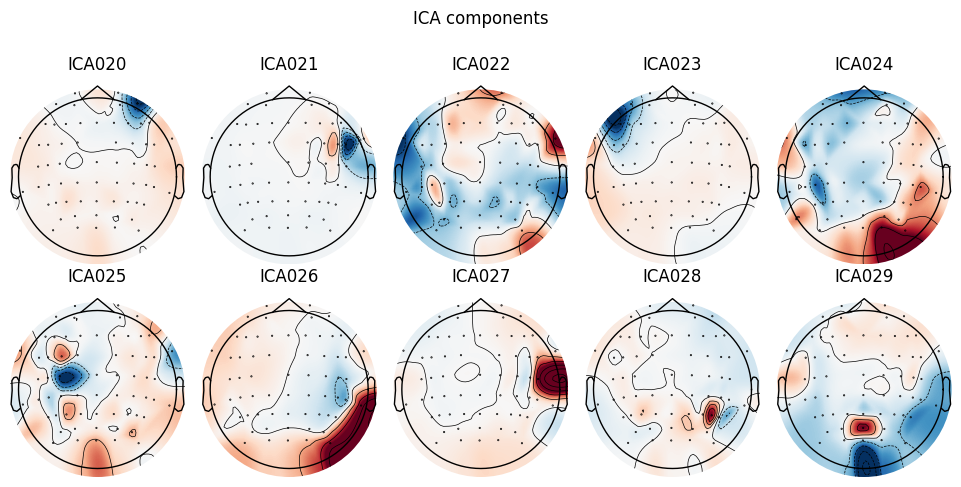

In [352]:
ica = ica_thing(30, epochs)

In [353]:
ica.plot_sources(epochs);

Using data from preloaded Raw for 28 events and 9501 original time points ...
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated


In [354]:
elim = np.arange(30)
elim = np.delete(elim, [0,1,2,5,7,8,9,10, 15, 16,17,22])

In [355]:
_epochs = epochs.copy()
ica.exclude = elim

# ica.apply() changes the Raw object in-place, so let's make a copy first:

_epochs.load_data()
ica.apply(_epochs)

_epochs.plot();

Using data from preloaded Raw for 28 events and 9501 original time points ...
Applying ICA to Epochs instance
    Transforming to ICA space (30 components)
    Zeroing out 18 ICA components
    Projecting back using 63 PCA components


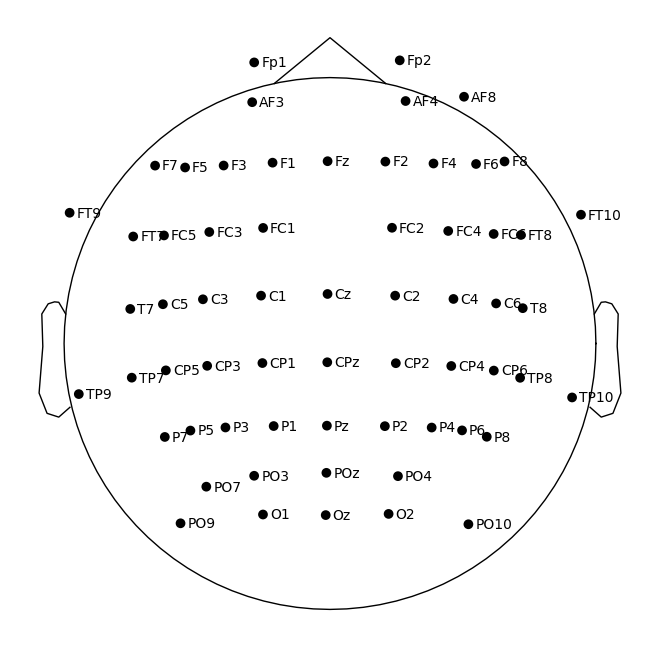

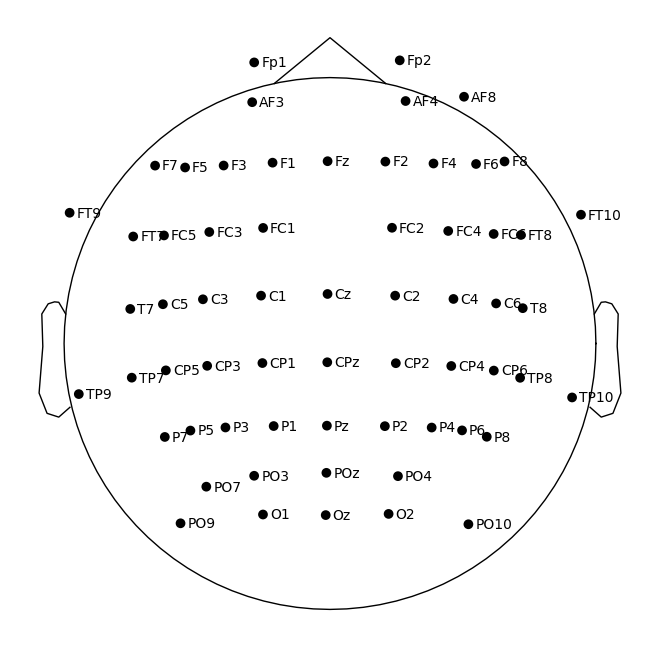

In [145]:
new_raw2.plot_sensors(show_names=True)

In [444]:
epochs.load_data()
epochs_avg_ref = epochs.copy().set_eeg_reference(ref_channels='average')


Using data from preloaded Raw for 28 events and 9501 original time points ...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


In [445]:
epochs_avg_ref = _epochs.copy().set_eeg_reference(ref_channels='average')
#raw_avg_ref.plot()

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


In [189]:
epochs_avg_ref.plot()

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


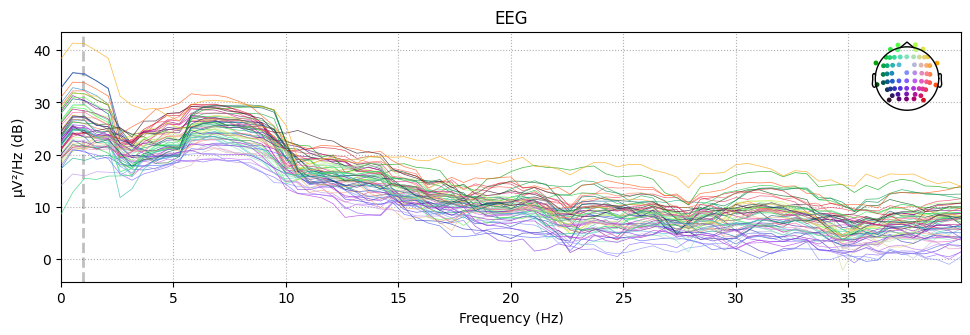

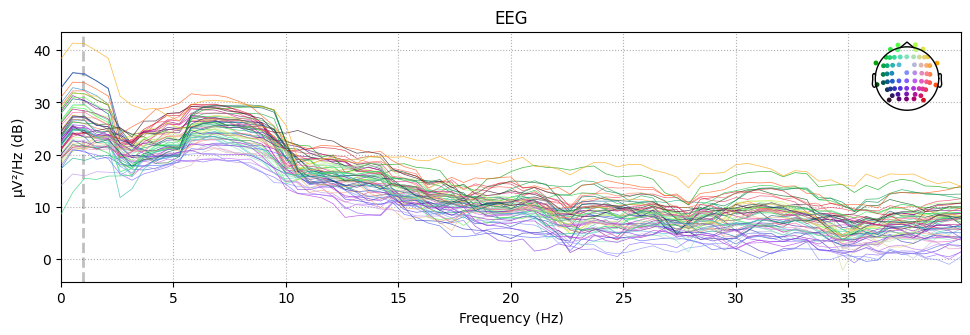

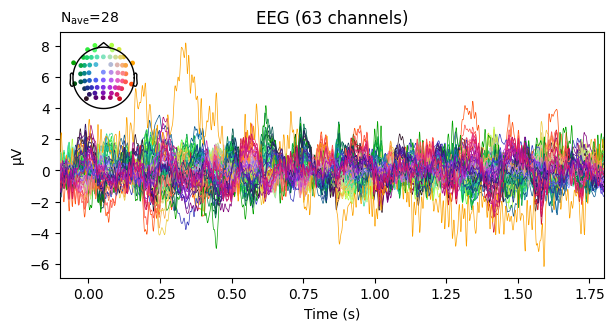

In [446]:
evoked = epochs_avg_ref.copy().average()
evoked.plot();

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows


/external/rprshnas01/kcni/sbastiaens/envs/newver/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


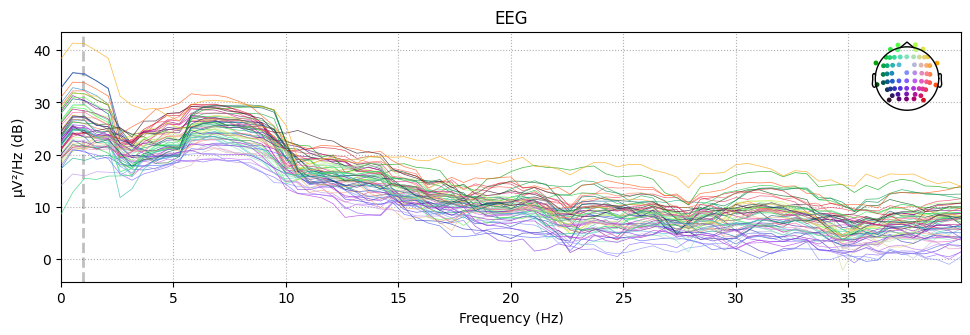

In [447]:
evoked.plot_psd(fmax=40)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows


/external/rprshnas01/kcni/sbastiaens/envs/newver/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


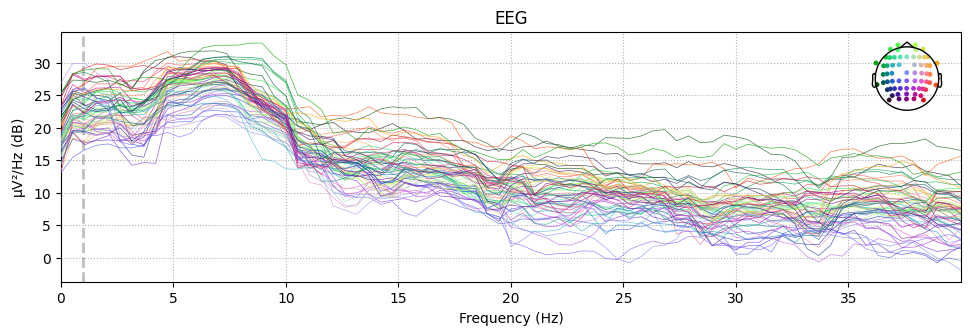

In [342]:
evoked.plot_psd(fmax=40)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows


/external/rprshnas01/kcni/sbastiaens/envs/newver/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


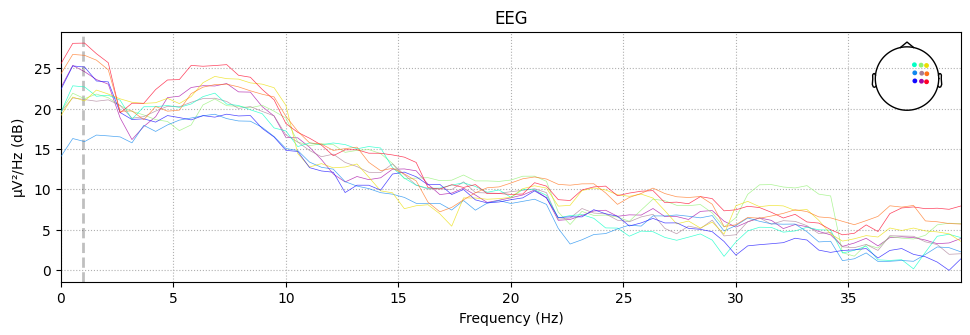

In [359]:
evoked.plot_psd(fmax=40,picks=['FC2','FC4','FC6','C2','C4','C6','CP6','CP2','CP4'])

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows


/external/rprshnas01/kcni/sbastiaens/envs/newver/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


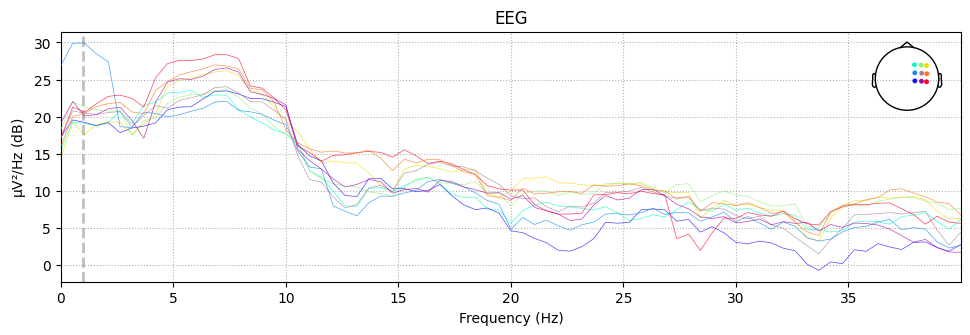

In [343]:
evoked.plot_psd(fmax=40,picks=['FC2','FC4','FC6','C2','C4','C6','CP6','CP2','CP4'])

In [448]:
epoch_name = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub22_ses00_noica_2-epo.fif'
epochs_avg_ref.save(epoch_name)

In [40]:
mne.viz.set_browser_backend('qt')

'qt'

In [143]:
def ica_thing(n_components, raw):
    ica = ICA(n_components=n_components, max_iter='auto', random_state=97)
    ica.fit(raw)
    ica.plot_components();
    return ica

In [91]:
stim_chan = raw.copy().pick_channels(['stim'])
events = mne.event.find_events(stim_chan)


raw_dat = raw.pick_types(eeg=True).get_data()
raw_dat_demean = np.zeros_like(raw_dat)
for ch, chan_data in enumerate(raw_dat):
    raw_dat_demean[ch] = raw_dat[ch] - raw_dat[ch].mean()   

new_raw2 = mne.io.RawArray(raw_dat_demean, raw.pick_types(eeg=True).info)




31 events found
Event IDs: [1 2]
Creating RawArray with float64 data, n_channels=64, n_times=479600
    Range : 0 ... 479599 =      0.000 ...    95.920 secs
Ready.


In [46]:
new_raw2.plot();

Channels marked as bad:
none


In [92]:
epochs = mne.Epochs(new_raw2, events, tmin=-0.1, tmax=1.8, baseline=None)

Not setting metadata
31 matching events found
No baseline correction applied
0 projection items activated


In [13]:
epochs.plot();

Using data from preloaded Raw for 31 events and 9501 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 20 events and 9501 original time points ...
Using data from preloaded Raw for 3 events and 9501 original time points ...
Using data from preloaded Raw for 3 events and 9501 original time points ...
Using data from preloaded Raw for 3 events and 9501 original time points ...
Using data from preloaded Raw for 3 events and 9501 original time points ...
Using data from preloaded Raw for 3 events and 9501 original time points ...
Using data from preloaded Raw for 3 events and 9501 original time points ...
Using data from preloaded Raw for 20 events and 9501 original time points ...
Using data from preloaded Raw for 3 events and 9501 original time points ...
Using data from preloaded Raw for 3 events and 9501 original time points ...
Using data from preloaded Raw for 3 events and 9501 original time points ...
Using data from preloaded Raw for 20 events and 9501

In [93]:
epochs.load_data()
epochs.drop_channels(['AF7', 'PO8', 'FT8', 'F5', 'FT9', 'FT7', 'FT10'])

Using data from preloaded Raw for 31 events and 9501 original time points ...
0 bad epochs dropped


<Epochs |  31 events (all good), -0.1 - 1.8 sec, baseline off, ~128.2 MB, data loaded,
 '1': 1
 '2': 30>

In [65]:
epochs.plot();

In [18]:
ls

exploration.ipynb             preprocessed/
exploration_sb.ipynb          Preprocessing_pipeline.ipynb
fif/                          Preprocessing_pipeline_po.ipynb
fif2/                         Preprocessing_pipeline_sb.ipynb
Loading_1_subject_data.ipynb


In [ ]:
test_epoch = epochs.copy()
filtered_epochs = mne.filter.notch_filter(test_epoch, 5000, 130)

In [99]:
mne.filter.notch_filter(test_epoch, 5000, 130)

TypeError: This low-level function only operates on np.ndarray instances. To get a notch filtered Epochs instance, use a method like `inst_new = inst.copy().notch_filter(...)` instead.

Fitting ICA to data using 57 channels (please be patient, this may take a while)


/tmp/ipykernel_7552/3078836132.py:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 50 components
Fitting ICA took 77.2s.


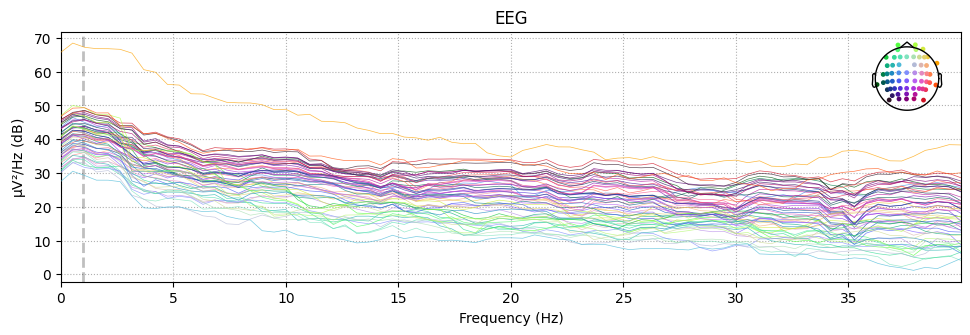

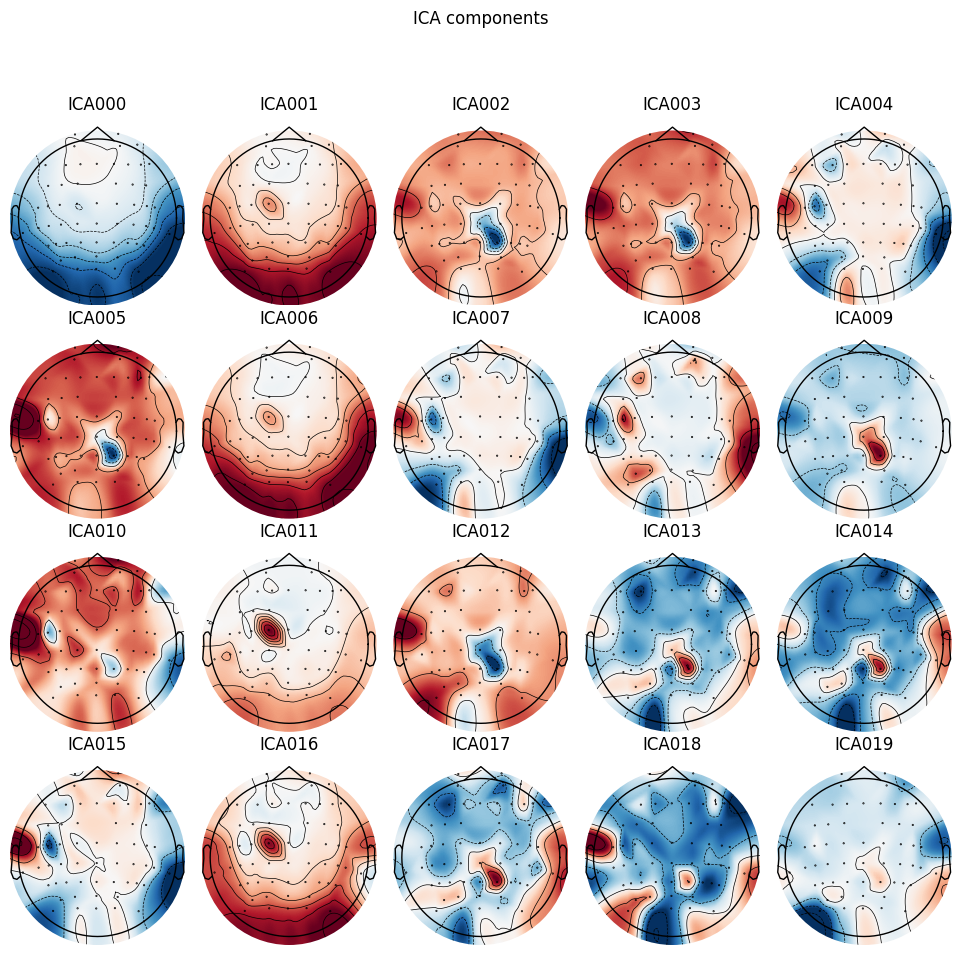

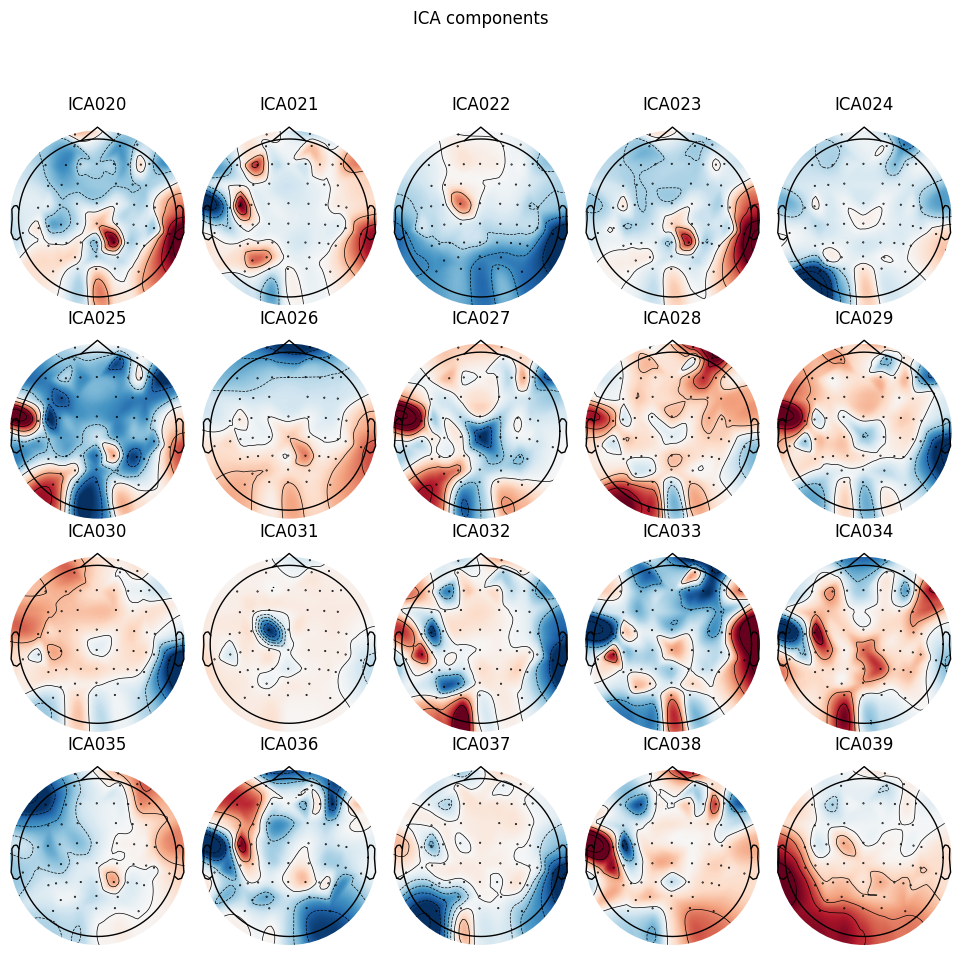

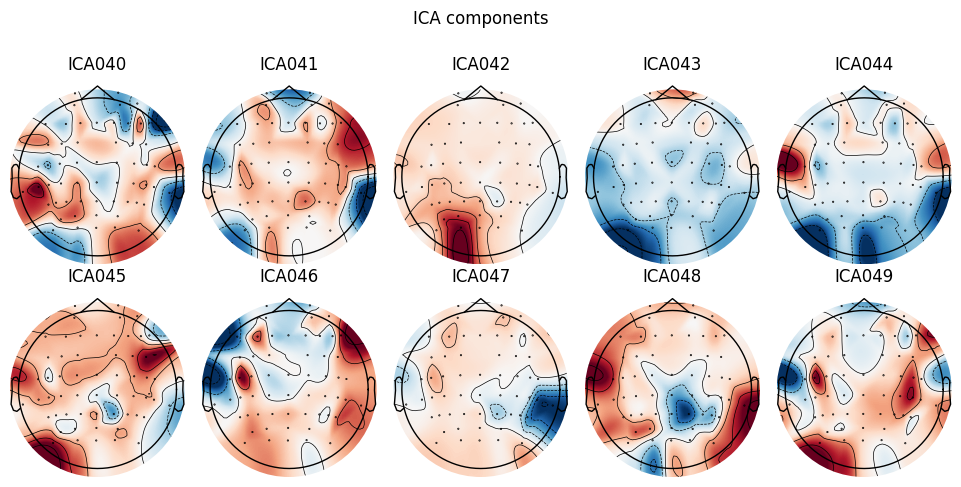

In [77]:
ica = ica_thing(50, epochs)

In [78]:
ica.plot_sources(epochs);

Not setting metadata
31 matching events found
No baseline correction applied
0 projection items activated


In [79]:
_epochs = epochs.copy()
ica.exclude = [0,1,6]

# ica.apply() changes the Raw object in-place, so let's make a copy first:

_epochs.load_data()
ica.apply(_epochs)

_epochs.plot();

Applying ICA to Epochs instance
    Transforming to ICA space (50 components)
    Zeroing out 3 ICA components
    Projecting back using 57 PCA components


In [85]:
type(post_ica)

mne.epochs.Epochs

In [86]:
post_ica = _epochs.copy()
filtered_epochs = post_ica.copy().filter(1, 100, filter_length=1000)

Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1001 samples (0.200 sec)



ValueError: The requested filter length 1001 is too short for the requested 0.50 Hz transition band, which requires 16501 samples

In [69]:
filtered_epochs.plot();

In [23]:
filtered_epochs.drop([11,12,13,28,29])

Dropped 5 epochs: 11, 12, 13, 28, 29


<Epochs |  26 events (all good), -0.1 - 1.8 sec, baseline off, ~107.5 MB, data loaded,
 '1': 1
 '2': 25>

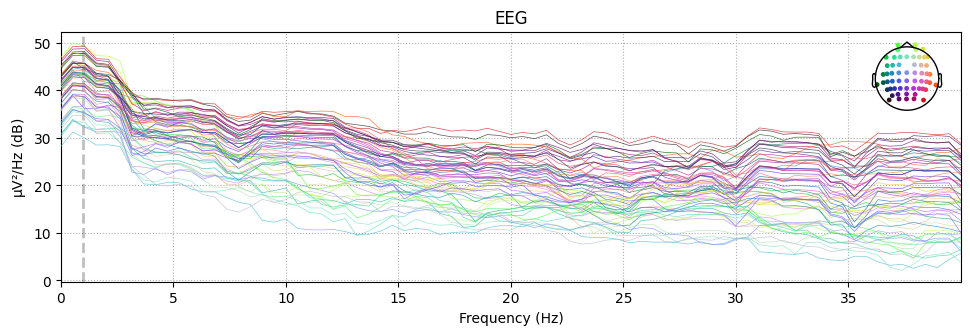

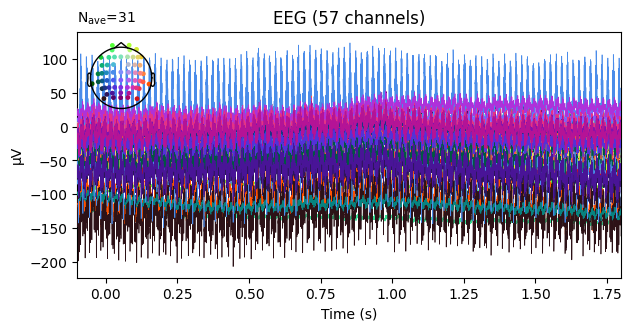

In [87]:
evoked = post_ica.copy().average()
evoked.plot();

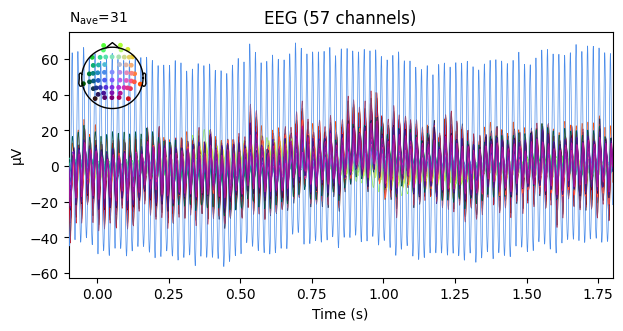

In [81]:
evoked = filtered_epochs.copy().average()
evoked.plot();

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows


/external/rprshnas01/kcni/sbastiaens/envs/newver/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


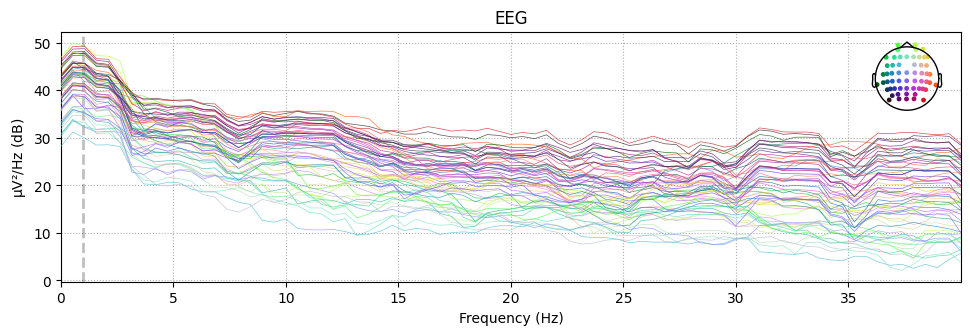

In [82]:
evoked.plot_psd(fmax=40)

In [344]:
epoch_name = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub22_ses05-epo.fif'
epochs_avg_ref.save(epoch_name)